In [ ]:
# Demo Project on Synthetic dataset

# Objective:
# The objective of this project is to develop a machine learning model to predict customer churn in a telecommunications company.
# By identifying at-risk customers, the company can take proactive measures such as personalized offers, improved customer service,
# and loyalty programs to reduce churn and retain customers.

# Problem Statement:
# Customer churn is a major issue for telecom companies, as losing customers directly impacts revenue and growth.
# The goal is to analyze customer data, identify patterns that contribute to churn, and build predictive models that can
# accurately classify customers as likely to churn or not. This will help the company optimize customer retention strategies.

# Steps to Implement the Project:
# 1. **Data Collection**: Load the Telco Customer Churn dataset.
# 2. **Data Preprocessing**:
#    - Remove irrelevant features (e.g., customerID).
#    - Convert categorical variables into numerical representations.
#    - Handle missing values appropriately.
#    - Perform feature scaling where necessary.
# 3. **Exploratory Data Analysis (EDA)**:
#    - Visualize the data to understand key patterns.
#    - Check correlations between features and churn.
#    - Handle imbalanced data using SMOTE.
# 4. **Outlier Detection and Handling**:
#    - Use boxplots to detect outliers.
#    - Apply methods such as IQR filtering or log transformations to manage outliers.
# 5. **Feature Engineering**:
#    - Create new meaningful features (e.g., monthly charges per tenure).
#    - Select the most important features using feature importance analysis.
# 6. **Model Training and Evaluation**:
#    - Train multiple models including Logistic Regression, Decision Tree, Random Forest, XGBoost, SVM, Naive Bayes, and KNN.
#    - Tune hyperparameters for key models.
#    - Evaluate models using Accuracy, Precision, Recall, F1 Score, and ROC AUC.
# 7. **Model Comparison and Visualization**:
#    - Compare different models based on their performance metrics.
#    - Visualize results using bar charts, heatmaps, and ROC curves.

In [ ]:
#1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_auc_score, roc_curve, auc

In [ ]:
#2. Load and Explore the Dataset
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display first few rows
print(df.head())

# Check for null values and data types
print(df.info())
print(df.isnull().sum())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
#3. Data Preprocessing
# Drop irrelevant columns
df = df.drop(['customerID'], axis=1)

# Handle missing values in the TotalCharges column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

# Encoding categorical variables
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Splitting features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


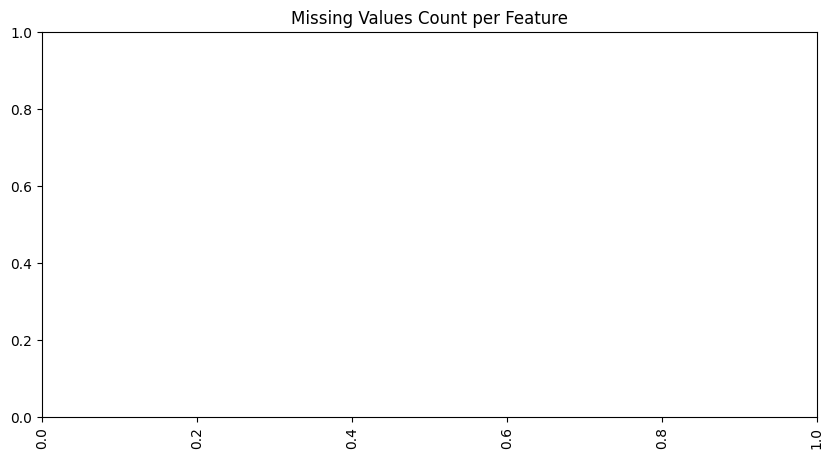

In [ ]:
#4. Data Visulization
# Visualizing missing values using bar plot
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='coolwarm')
plt.title("Missing Values Count per Feature")
plt.xticks(rotation=90)
plt.show()
# Interpretation: Helps to identify missing values distribution across features.

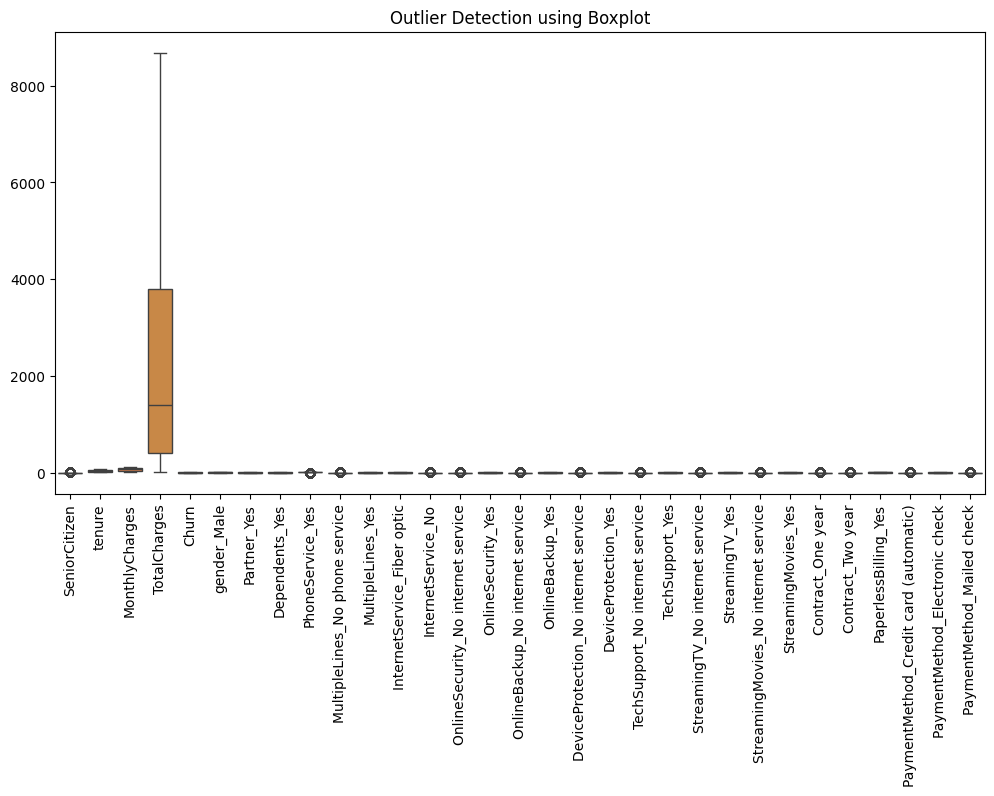

In [ ]:
# Checking outliers using boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Outlier Detection using Boxplot")
plt.xticks(rotation=90)
plt.show()
# Interpretation: Identify features with extreme values
# that may impact model performance.

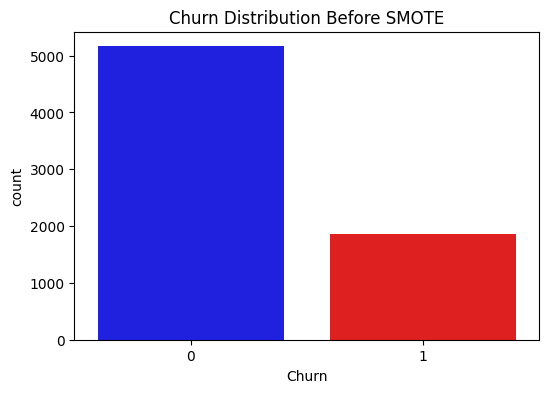

In [ ]:
# Churn distribution before handling imbalance
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette=['blue', 'red'])
plt.title("Churn Distribution Before SMOTE")
plt.show()
# Interpretation: If the churn distribution is highly imbalanced,
# models may predict the majority class more often.

In [ ]:
# Handling imbalance with SMOTE
from imblearn.over_sampling import SMOTE # Import SMOTE from imblearn.over_sampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


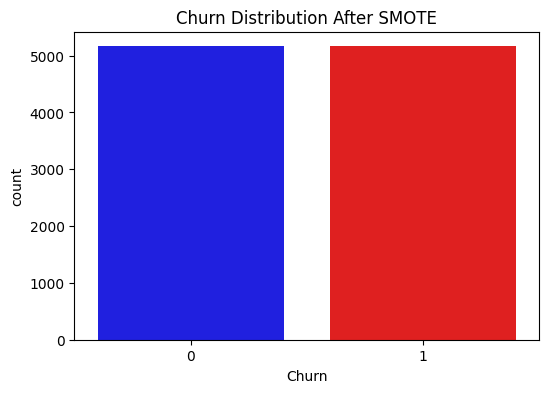

In [ ]:
# Churn distribution after handling imbalance
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled, palette=['blue', 'red'])
plt.title("Churn Distribution After SMOTE")
plt.show()

# Interpretation: This ensures that both classes are balanced,
#allowing the model to learn better from minority class examples.

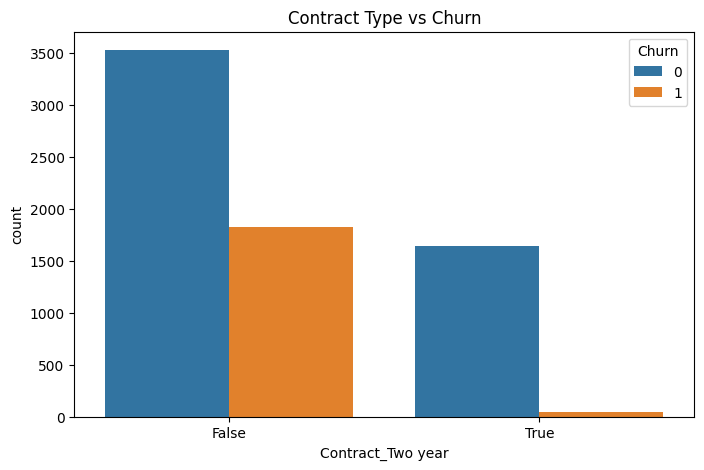

In [ ]:
# Contract type vs Churn
plt.figure(figsize=(8,5))
sns.countplot(x='Contract_Two year', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()

# Interpretation: Customers with month-to-month contracts likely have
# higher churn rates compared to longer-term contracts.


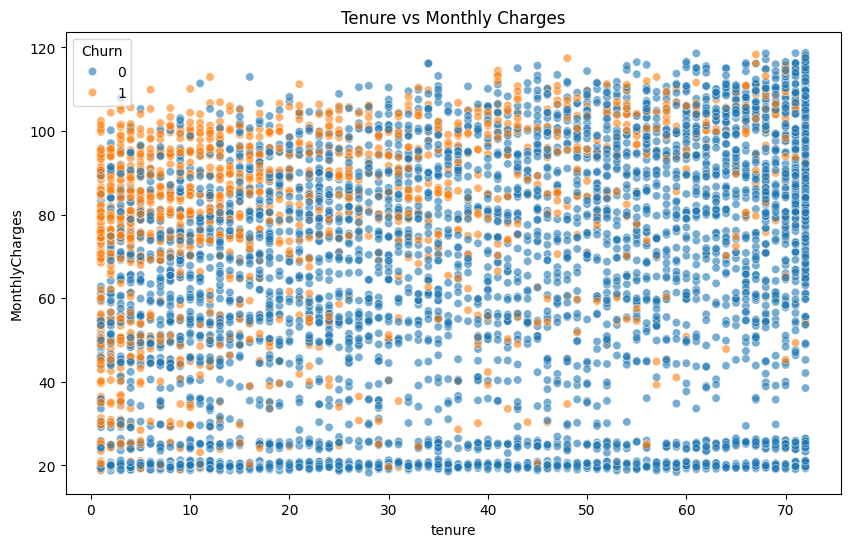

In [ ]:
# Monthly Charges vs Tenure (Scatter plot)
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, alpha=0.6)
plt.title("Tenure vs Monthly Charges")
plt.show()

# Interpretation: Customers with lower tenure and
# higher monthly charges may have a higher likelihood of churning.

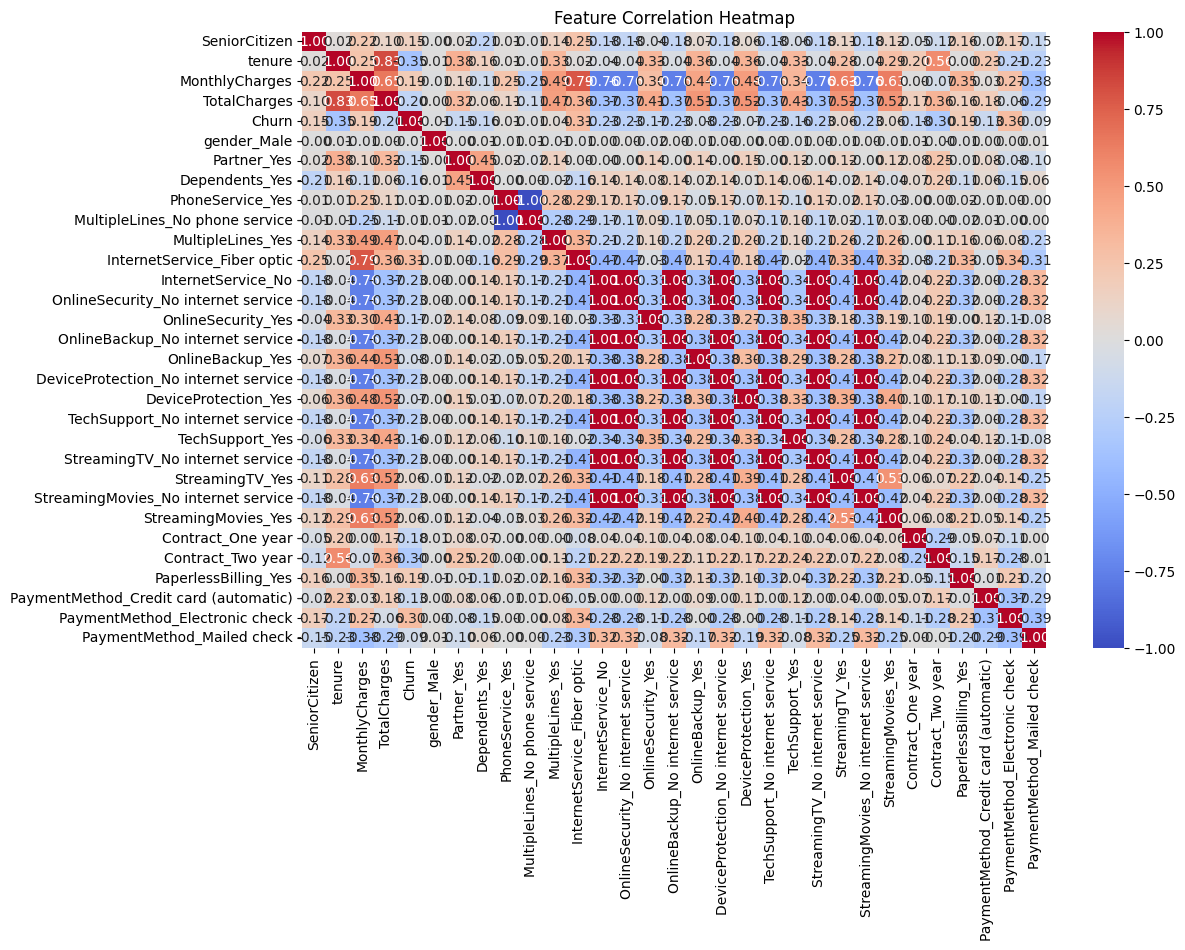

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()
# Interpretation: Strongly correlated features might indicate redundancy.
# Removing highly correlated features can improve model performance.

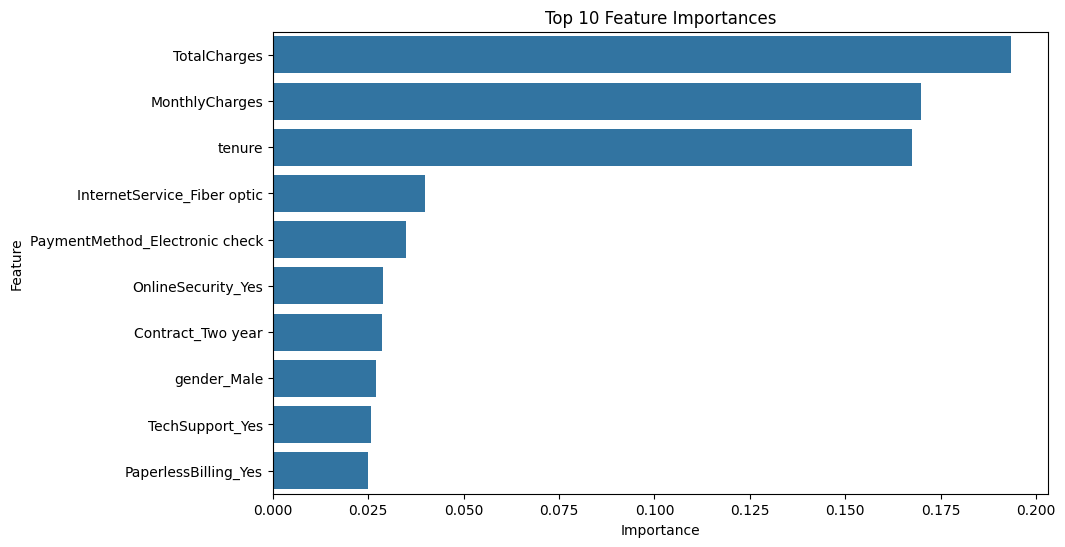

In [ ]:
# Feature Importance using RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title("Top 10 Feature Importances")
plt.show()
# Interpretation: Higher importance scores indicate features that contribute
# most to predicting churn.


In [ ]:
#4. Model Training and Evaluation Functions
# Function to train and evaluate models
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "ROC AUC": auc}

# Dictionary to store results
results = {}


In [ ]:
#5. Model Training
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
results['Logistic Regression'] = evaluate_model(log_reg)

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
results['Decision Tree'] = evaluate_model(tree)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
results['Random Forest'] = evaluate_model(rf)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
results['XGBoost'] = evaluate_model(xgb)

# SVM
svm = SVC(probability=True, random_state=42)
results['SVM'] = evaluate_model(svm)

# Naive Bayes
nb = GaussianNB()
results['Naive Bayes'] = evaluate_model(nb)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
results['KNN'] = evaluate_model(knn)

In [ ]:
#6. Displaying Results
# Convert results dictionary to DataFrame for easy viewing
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:\n", results_df)

Model Evaluation Results:
                      Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.787491   0.620579  0.516043  0.563504  0.831924
Decision Tree        0.725657   0.485222  0.526738  0.505128  0.663843
Random Forest        0.784648   0.625442  0.473262  0.538813  0.815336
XGBoost              0.763326   0.565916  0.470588  0.513869  0.809691
SVM                  0.781095   0.616197  0.467914  0.531915  0.782421
Naive Bayes          0.657427   0.428760  0.868984  0.574205  0.810223
KNN                  0.752665   0.536723  0.508021  0.521978  0.765243


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Dictionary to store best parameters for each model
best_params = {}

# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # solvers that support both l1 and l2
}
grid_log_reg = RandomizedSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_log_reg.fit(X_train, y_train)
best_params['Logistic Regression'] = grid_log_reg.best_params_

# 2. Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_rf.fit(X_train, y_train)
best_params['Random Forest'] = grid_rf.best_params_

# 3. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid_xgb = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_xgb = RandomizedSearchCV(xgb, param_grid_xgb, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_xgb.fit(X_train, y_train)
best_params['XGBoost'] = grid_xgb.best_params_

# Display the best hyperparameters for each model
print("Best Parameters for each model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")

Best Parameters for each model:
Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 100}
Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30}
XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


Model Evaluation Results:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.788913   0.624595  0.516043  0.565154  0.831701
Random Forest        0.802416   0.679104  0.486631  0.566978  0.831597
XGBoost              0.793888   0.682609  0.419786  0.519868  0.834483


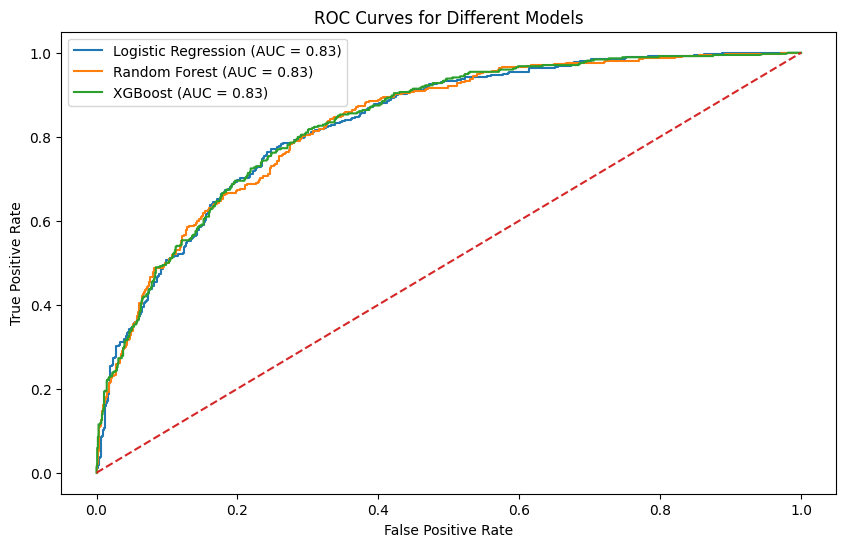

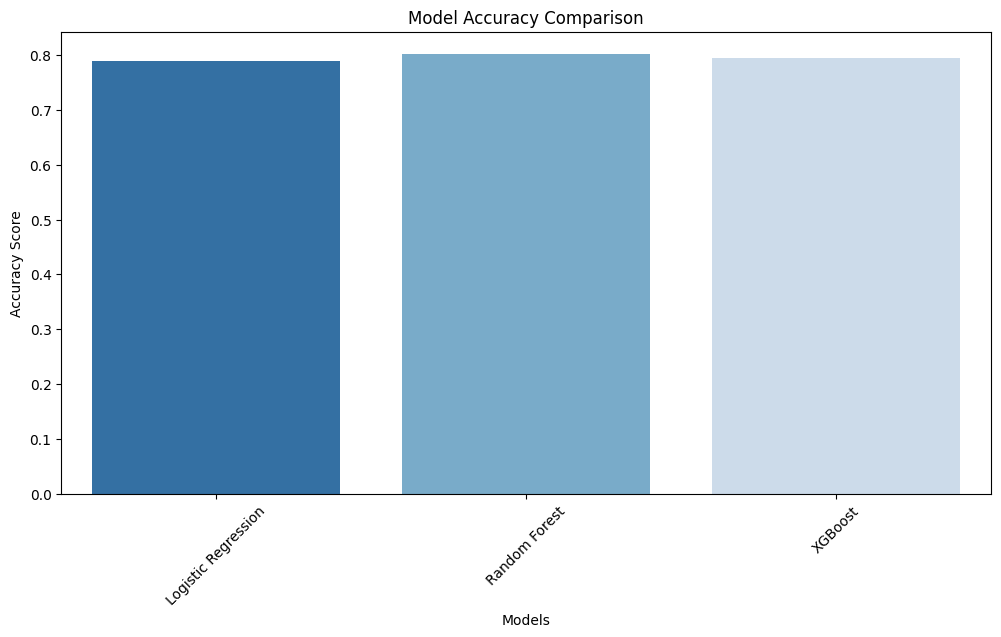

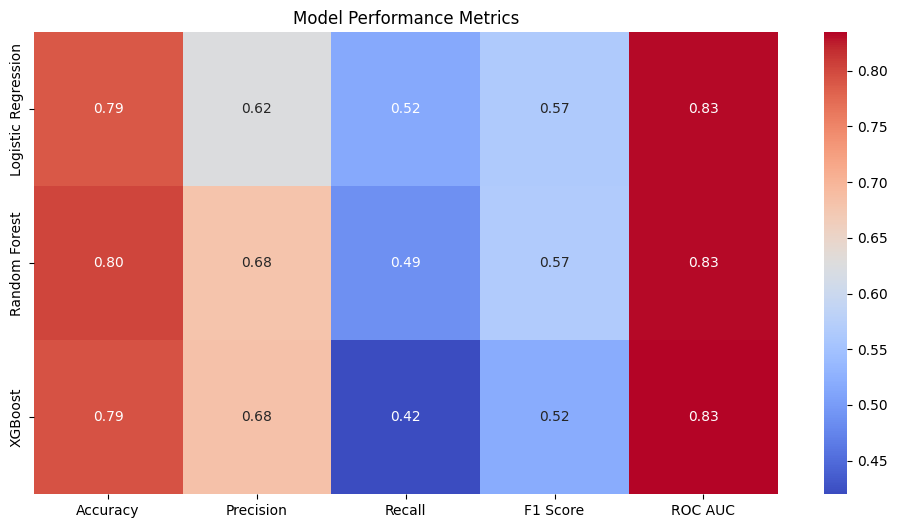

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', penalty='l1', C=100, max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features='log2', max_depth=30, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', subsample=0.8, n_estimators=200, max_depth=5, learning_rate=0.01, colsample_bytree=0.8, random_state=42),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred_proba)
    }

# Convert results dictionary to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)

# ROC Curve for all models
plt.figure(figsize=(10,6))
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    if y_pred_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title("ROC Curves for Different Models")
plt.show()

# Model Performance Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(results_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Model Performance Metrics")
plt.show()